In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import timeit

# Reading Amazon reviews CSV file

In [41]:
amazon_data= pd.read_csv("Reviews.csv")

In [3]:
amazon_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
len(amazon_data)

568454

In [43]:
# selecting only relevant field for sentimental analysis
data=amazon_data.loc[:,['Summary','Score','ProductId','HelpfulnessNumerator','HelpfulnessDenominator','Text' ]]

In [44]:
# checking any null values
data.isnull().sum()

Summary                   27
Score                      0
ProductId                  0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Text                       0
dtype: int64

In [45]:
# total reviews for every score
groupbyScore=data.groupby('Score')['Text']
groupbyScore.count()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: Text, dtype: int64

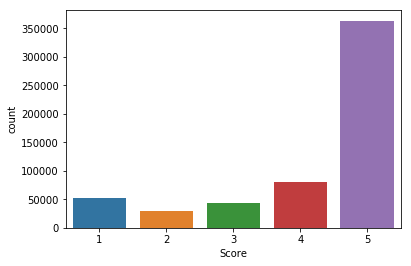

In [46]:
#count plot for Score
sns.countplot(x='Score',data=data)

In [47]:
# let's look at some of the reviews(summary) for Score 2
data[data['Score']==2]['Summary'].head(10)
# we observe that customers giving score as 2 have negative reviews

3                 Cough Medicine
16                    poor taste
67         Taste is not so good.
74               nothing special
110    Low Carb Angel Food Puffs
131                   Not for me
146       BROKEN BOTTLE BOTTOMS!
200               Altoids Smalls
212       Nearly killed the cats
224               Not a real tea
Name: Summary, dtype: object

In [48]:
# let's look at some of the reviews(summary) for Score 3
data[data['Score']==3]['Summary'].head(10)
# we observe that customers giving score as 3 are neutral

45                                        Hearty Oatmeal
47                                                 Mushy
49                                            Same stuff
53                                        not ass kickin
60                       Better price for this at Target
68     How much would you pay for a bag of chocolate ...
78                            Order only in cold weather
83                         Natural Balance Lamb and Rice
84                             INCREASED MY DOGS ITCHING
106                                        disappointing
Name: Summary, dtype: object

In [49]:
# let's look at some of the reviews for Score 4
data[data['Score']==4]['Summary'].head(10)
# we observe that customers giving score as 4 are happy with the product

2                                 "Delight" says it all
5                                            Nice Taffy
13                                    fresh and greasy!
27                          Great Bargain for the Price
32                         Best of the Instant Oatmeals
33                                         Good Instant
35                                           satisfying
38                        GOOD WAY TO START THE DAY....
48    Very good but next time I won't order the Vari...
52             You'll go nuts over Ass-Kickin' Peanuts.
Name: Summary, dtype: object

In [15]:
# let's look at some of the reviews for Score 5
data[data['Score']==5]['Summary'].head(10)
# we observe that customers giving score as 5 are ssatisfied with the product

0                                 Good Quality Dog Food
4                                           Great taffy
6         Great!  Just as good as the expensive brands!
7                                Wonderful, tasty taffy
8                                            Yay Barley
9                                      Healthy Dog Food
10                      The Best Hot Sauce in the World
11    My cats LOVE this "diet" food better than thei...
14                         Strawberry Twizzlers - Yummy
15             Lots of twizzlers, just what you expect.
Name: Summary, dtype: object

In [51]:
#we will perform sentimental analysis on positive and negative reviews
# removing neutral ones
data=data[data['Score']!=3]

In [52]:
# adding new column sentiments based on Score given by customer
data["Sentiment"] = data["Score"].apply(lambda score: "positive" if score > 3 else "negative")
#df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")

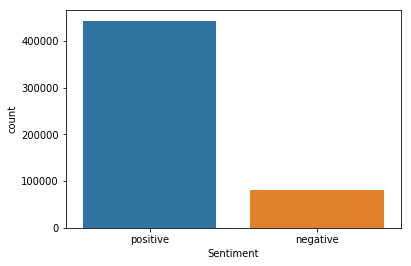

In [53]:
#Count plot of total positive and b=negative reviews
k=sns.countplot(x='Sentiment',data=data)

# Text Processing

In [19]:
#assigning new dimension to each word and work with word counts
#text processing
#importing 
import string
import re
string.punctuation
from nltk.corpus import stopwords

In [54]:
# creating cleanup function
# removing special character and trailing spaces
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

In [55]:
data['Text_Clean']=data['Text'].apply(cleanup)

In [57]:
# we will apply the same cleanup on Summary
# first we need to remove Nan values from Summary Column
df=data.dropna(subset=['Summary'])
df['Summary_Clean']=df['Summary'].apply(cleanup)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
#looking at clean summary
df['Summary_Clean'][0]

'good quality dog food'

In [59]:
# Looking at Clean text
data['Text_Clean'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most'

# Creating Wordcloud for the reviews given

In [70]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
#mpl.rcParams['font.size']=12                
#mpl.rcParams['savefig.dpi']=100              
#mpl.rcParams['figure.subplot.bottom']=.1
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
     fig.suptitle(title, fontsize=20)
     fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

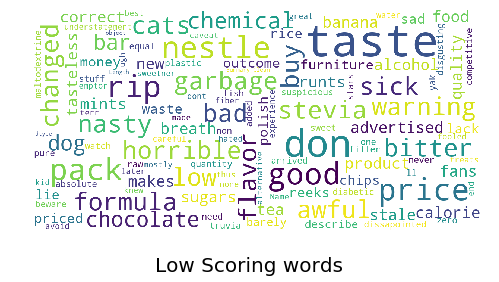

In [74]:
show_wordcloud(df[(df['Score']==1) | (df['Score']==2)]['Summary_Clean'], title="Low Scoring words")

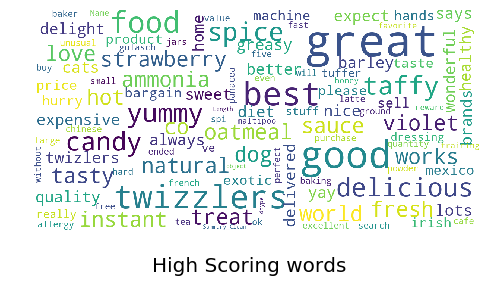

In [73]:
show_wordcloud(df[(df['Score']==4) | (df['Score']==5)]['Summary_Clean'], title="High Scoring words")

# Feature Extraction from Text
## Using TfIDF(Term Freq Inverse Doc Frequency)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

In [25]:
tfidf_transformer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
reviews_tfidf = tfidf_transformer.fit_transform(data['Text_Clean'])

In [75]:
reviews_tfidf.shape

(525814, 3840528)

In [27]:
X=reviews_tfidf
y= data['Sentiment']

# Split the Data Into Training and Testing Prior to Training

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Function to train our data


In [34]:
def model_fit(model):
    modelFit=model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_predict_test)
    sns.heatmap(cm, annot=True)
    print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))
    coef_show = 1
    if coef_show == 1: 
        w = tfidf_transformer.get_feature_names()
        coef = modelFit.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=False)
    print('')
    print('-Top 20 positive-')
    print(coeff_df.head(20).to_string(index=False))
    print('')
    print('-Top 20 negative-')      
    print(coeff_df.tail(30).to_string(index=False))
    return y_predict_test

# Aplying Naive Byes

Accuracy: 0.8482546142654735

-Top 20 positive-
Word  Coefficient
     br    -6.593492
  great    -7.153521
 coffee    -7.206716
   good    -7.226107
   like    -7.274908
    tea    -7.325266
   love    -7.358503
  br br    -7.454907
product    -7.492942
  taste    -7.502001
 flavor    -7.517447
   just    -7.537539
   food    -7.683331
   best    -7.733320
 amazon    -7.776618
 really    -7.808445
  price    -7.826746
    use    -7.918560
     ve    -7.937668
   time    -7.947062

-Top 20 negative-
Word  Coefficient
                                  aaaaaaahhhhhh   -15.648746
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa br   -15.648746
   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa   -15.648746
                                      aaaaaa br   -15.648746
                                    aaaaa start   -15.648746
                                    aaaaa doing   -15.648746
                                 aaa perfection   -15.648746
                                   aaa magazine   

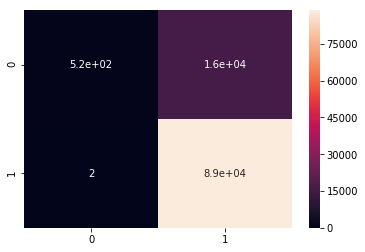

In [35]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
prediction=model_fit(NB_classifier)

# Applying Logistic Regression

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.9447809590825671

-Top 20 positive-
Word  Coefficient
           great    21.368900
            best    17.777634
       delicious    17.007823
         perfect    14.846045
           loves    13.509925
            love    13.095343
       excellent    12.852134
            good    11.622709
       wonderful    11.213648
        favorite    10.556383
            nice    10.451497
         amazing     9.981650
         awesome     9.814080
         pleased     9.077993
           yummy     8.785906
           happy     8.695915
highly recommend     8.630458
            easy     8.585638
          highly     8.514977
          smooth     8.499164

-Top 20 negative-
Word  Coefficient
    won buying    -6.969288
         china    -6.974857
      thinking    -7.093577
         gross    -7.234036
         waste    -7.240114
          poor    -7.320959
         nasty    -7.549541
          yuck    -7.578882
           rip    -7.695892
        hoping    -7.771978
         maybe   

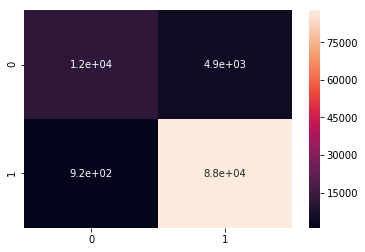

In [38]:
from sklearn.linear_model import LogisticRegression
start = timeit.timeit()
logmodel = LogisticRegression()
prediction=model_fit(logmodel)
end = timeit.timeit()
print(end - start)

# Visualization using bokeh